## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user

In [ ]:
!pip install imblearn

In [ ]:
!pip install imbalanced-learn==0.10.1

In [2]:
!pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.10.1
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: c:\users\n\appdata\roaming\python\python39\site-packages
Requires: threadpoolctl, scikit-learn, numpy, joblib, scipy
Required-by: imblearn


**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced


print("All libraries successfully imported")

All libraries successfully imported


## Loading the dataset

In [4]:
# i) Loading the dataset
# Update these paths based on the dataset location
train_path = "C:\\Users\\n\\Downloads\\RENE\\RENE\\train.csv.csv"
test_path = "C:\\Users\\n\\Downloads\\RENE\\RENE\\test.csv.csv"

# Load the datasets
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display the first few rows of the training and testing datasets
print("First 5 rows of the training dataset:")
print(train_data.head())

print("\nFirst 5 rows of the testing dataset:")
print(test_data.head())


First 5 rows of the training dataset:
         V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689  1.222987   

        V36       V37   

## Data Overview

- Observations
- Sanity checks

### 1) Observations

In [5]:
# Observations
print("\nTraining dataset shape:", train_data.shape)
print("Testing dataset shape:", test_data.shape)

print("\nTraining dataset info:")
print(train_data.info())

print("\nTesting dataset info:")
print(test_data.info())

print("\nSummary statistics for the training dataset:")
print(train_data.describe())


Training dataset shape: (20000, 41)
Testing dataset shape: (5000, 41)

Training dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 

### 2) Sanity checks

In [6]:
# Sanity checks
# Check for missing values
print("\nMissing values in training dataset:")
print(train_data.isnull().sum())

print("\nMissing values in testing dataset:")
print(test_data.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows in training dataset:", train_data.duplicated().sum())
print("Duplicate rows in testing dataset:", test_data.duplicated().sum())

# Check for unique values in the target column (if available in the train set)
if 'target' in train_data.columns:  # Replace 'target' with the actual target column name
    print("\nUnique values in the target column:")
    print(train_data['target'].value_counts())


Missing values in training dataset:
V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

Missing values in testing dataset:
V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32      

1) Dataset Loading

-Reads train.csv and test.csv files into pandas DataFrames.

-Displays the first few rows to check the structure.

2) Observations
-Provides dataset shapes (number of rows and columns).

-Uses info() for column details and data types.

-Displays summary statistics of numeric features with describe().


3) Sanity Checks

-Checks for missing values using isnull().sum().

-Identifies duplicate rows with duplicated().sum().

-Lists unique values in the target column to assess class imbalance (if the column exists).

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [10]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


### Plotting all the features at one go

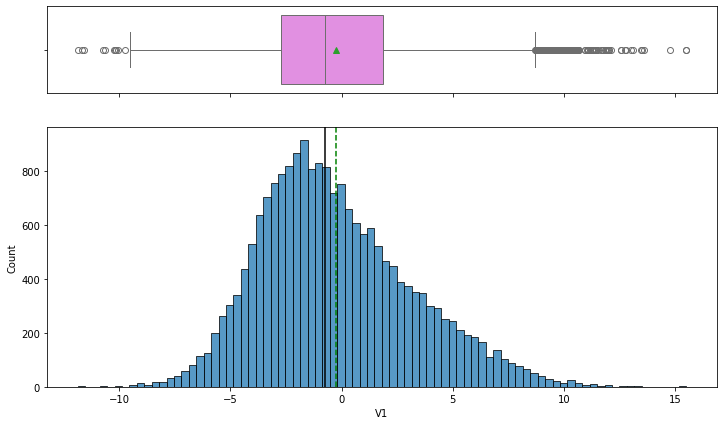

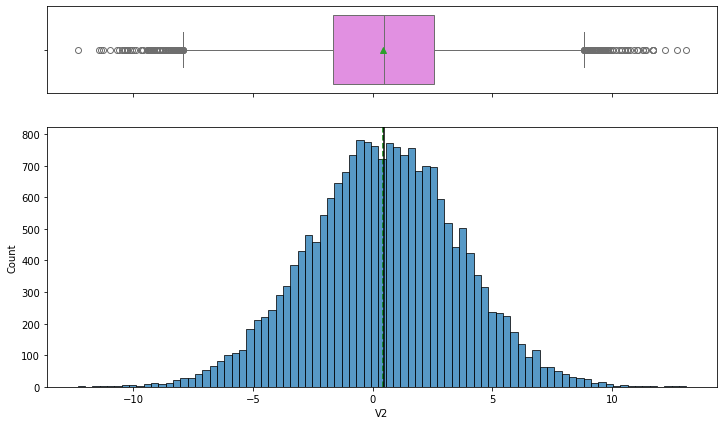

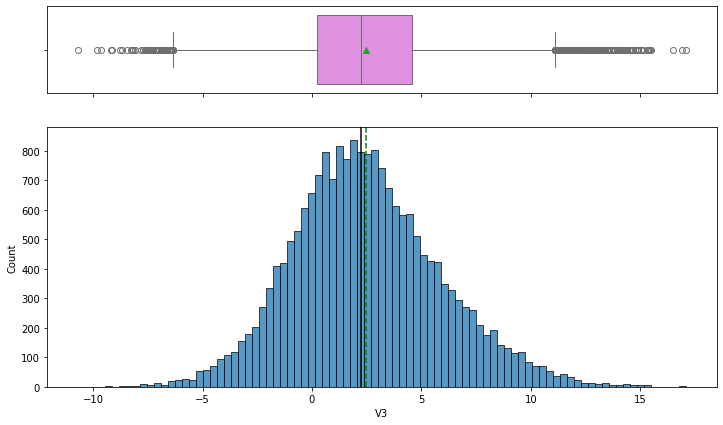

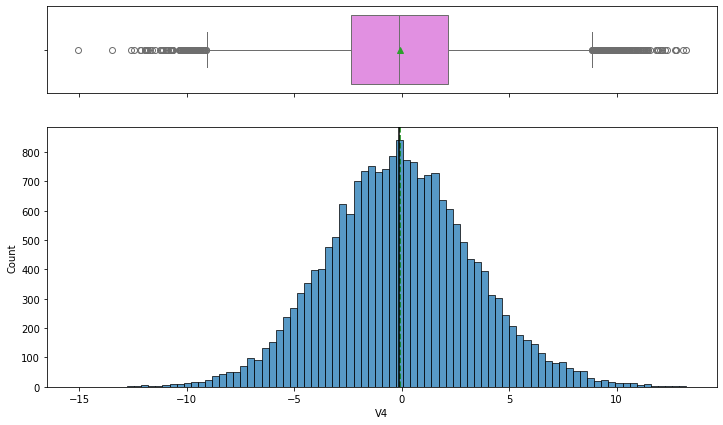

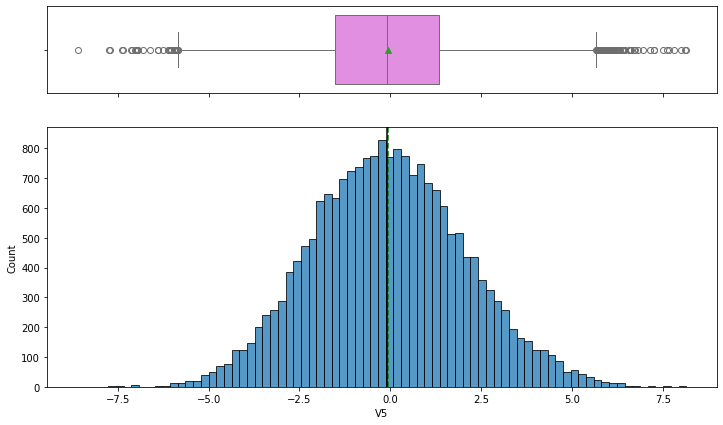

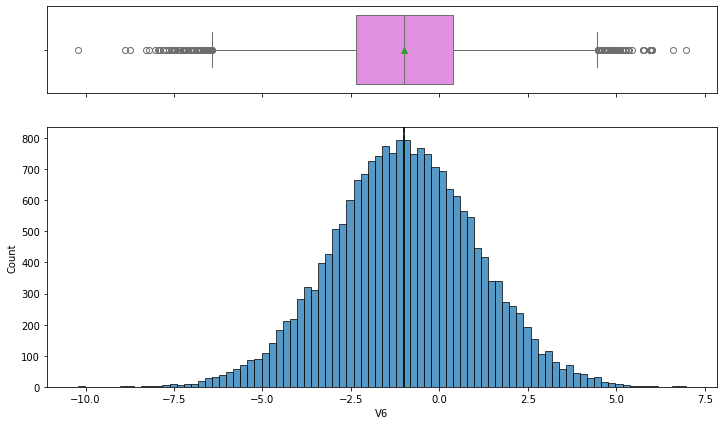

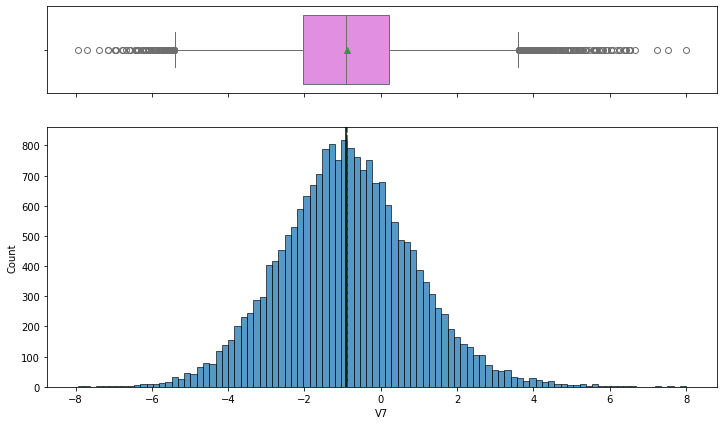

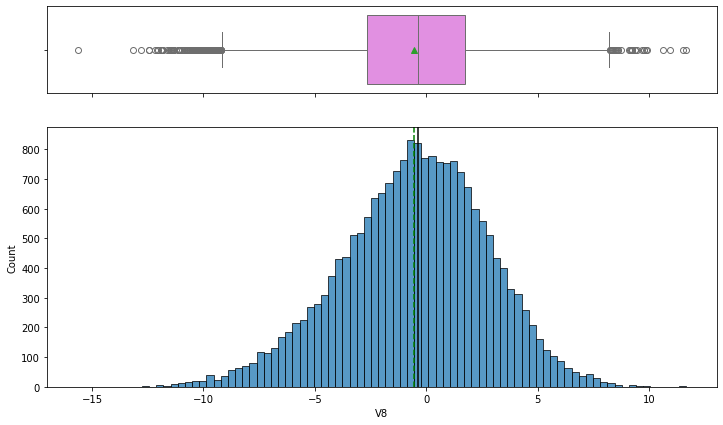

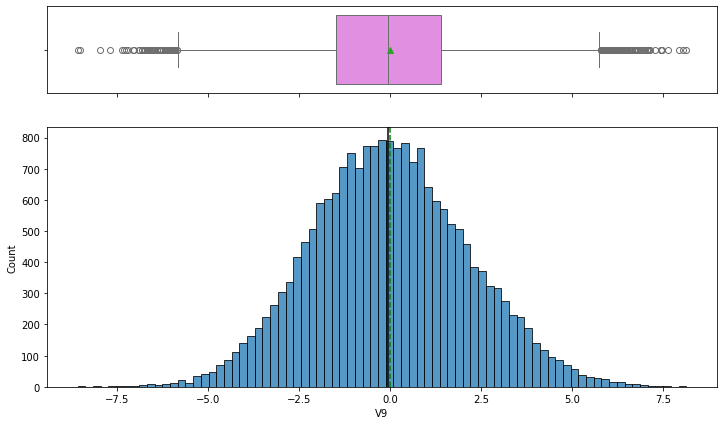

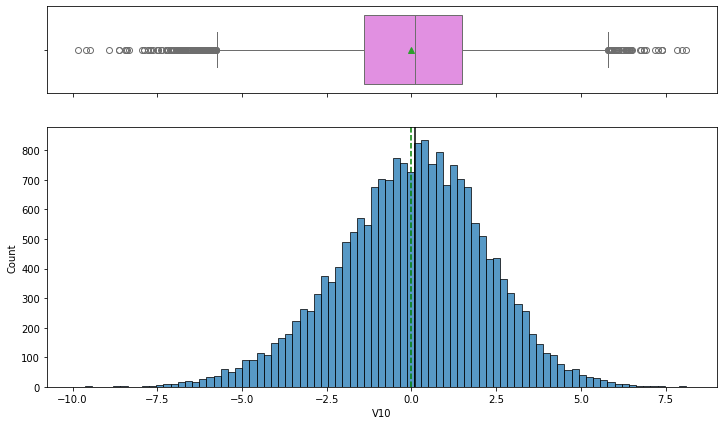

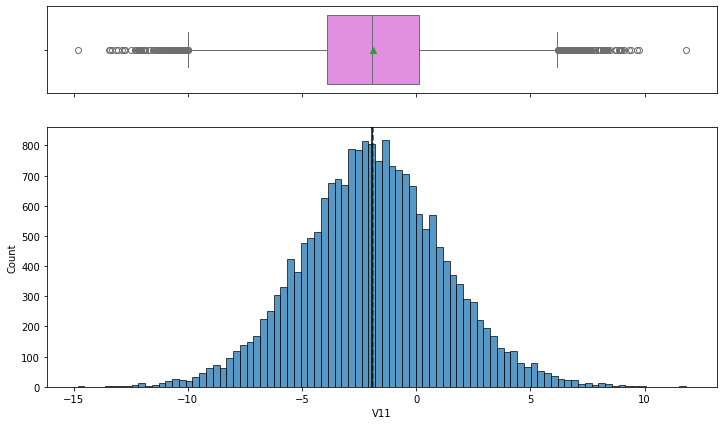

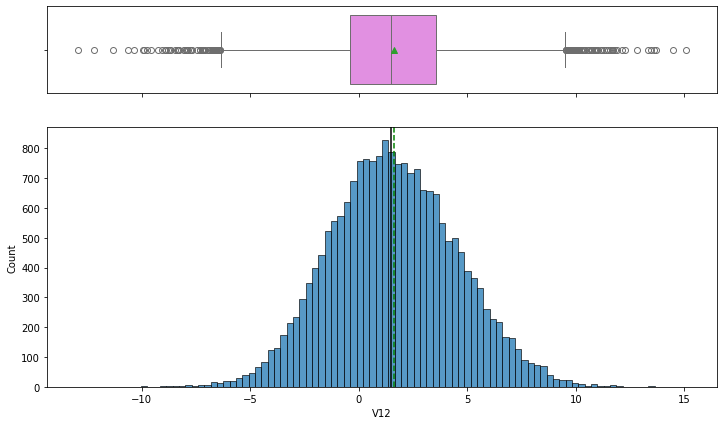

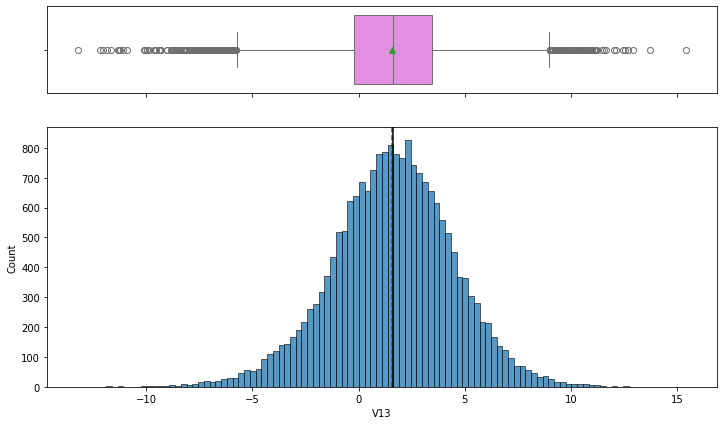

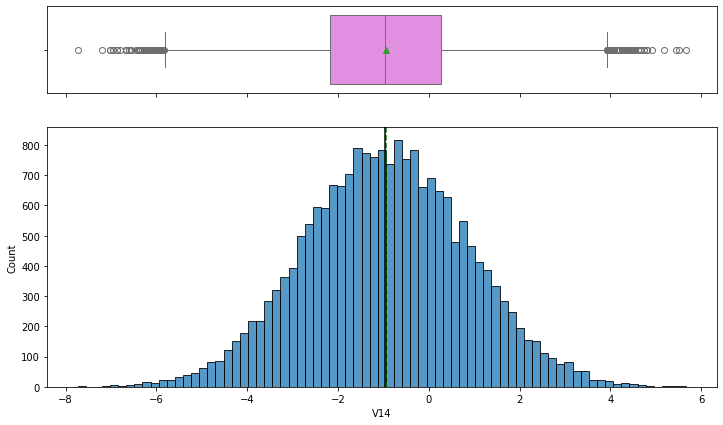

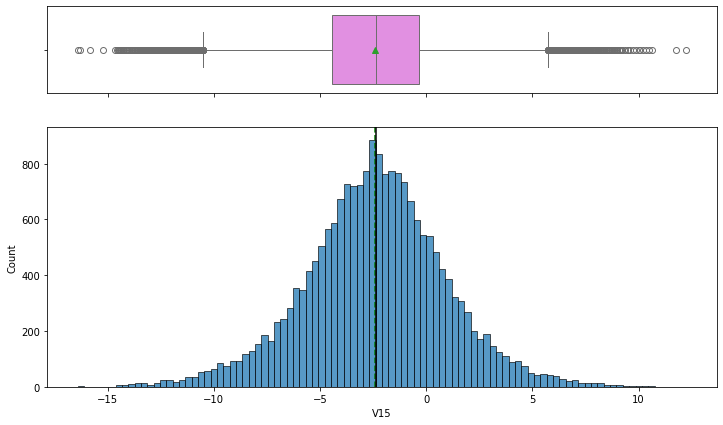

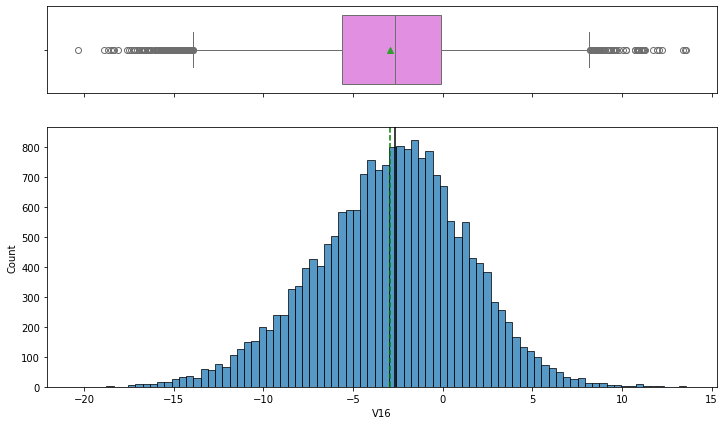

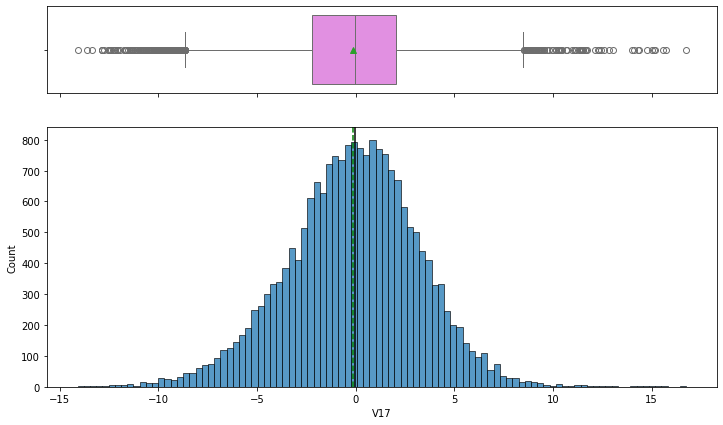

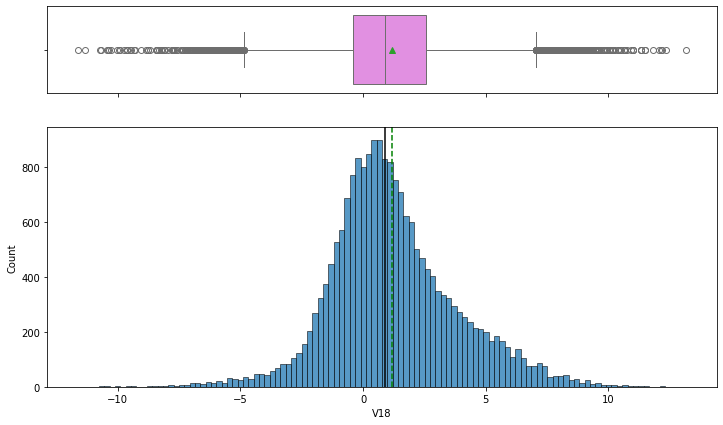

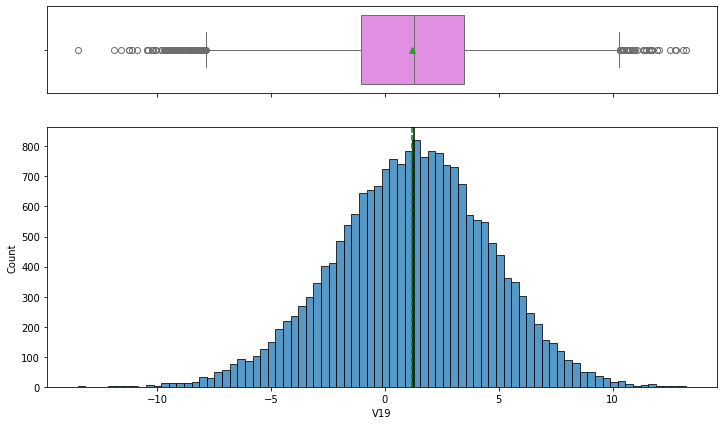

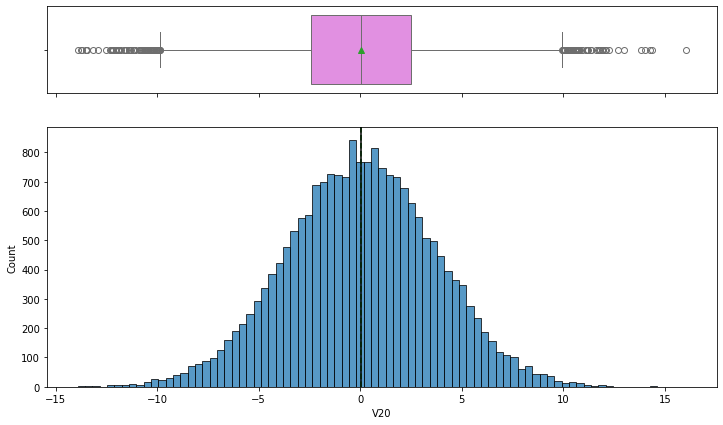

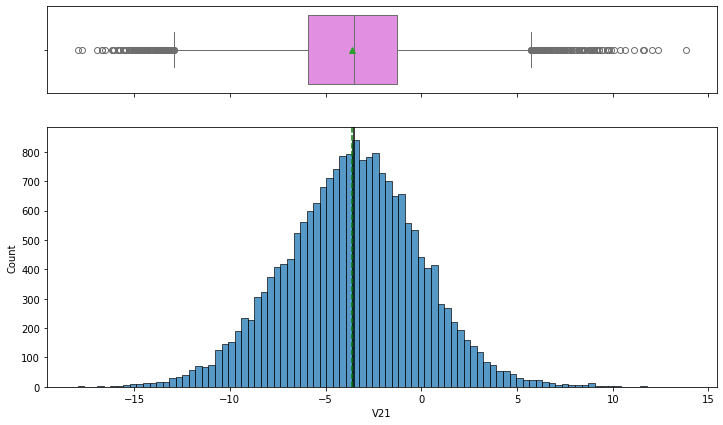

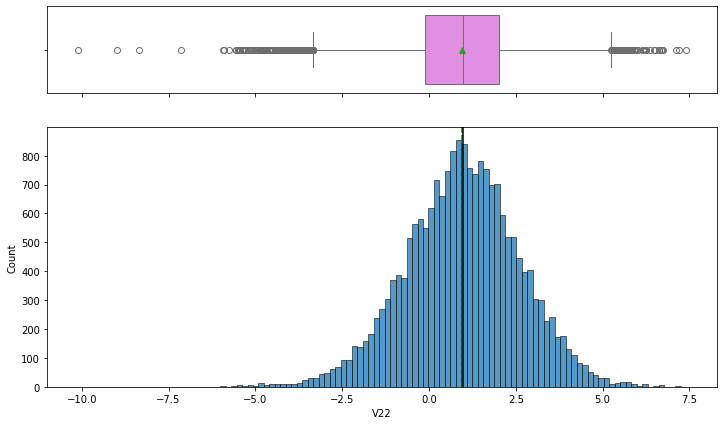

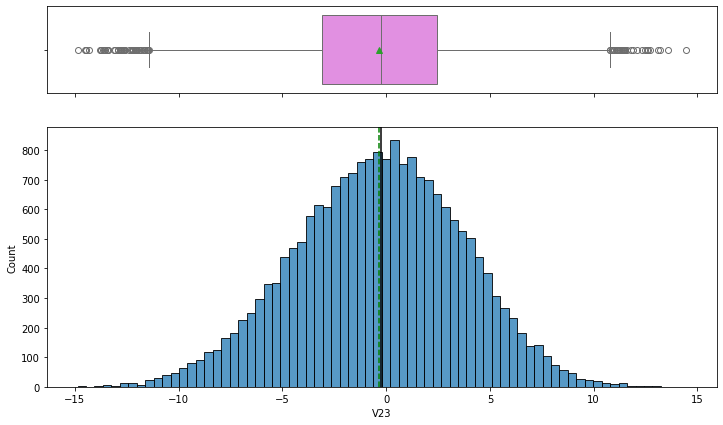

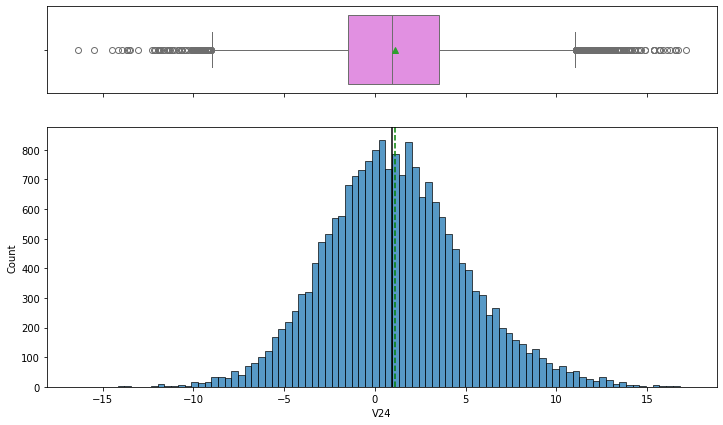

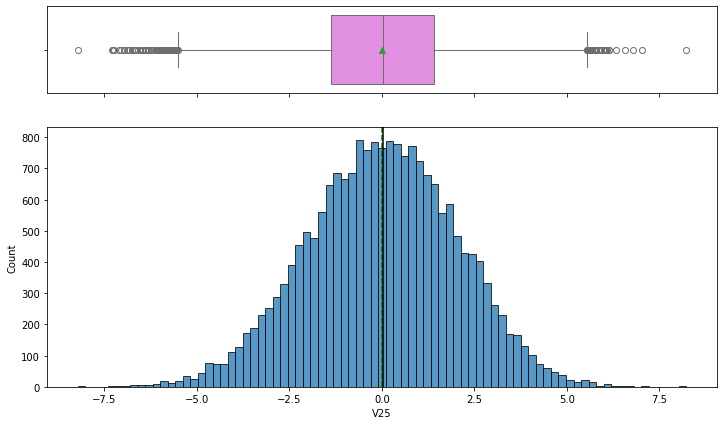

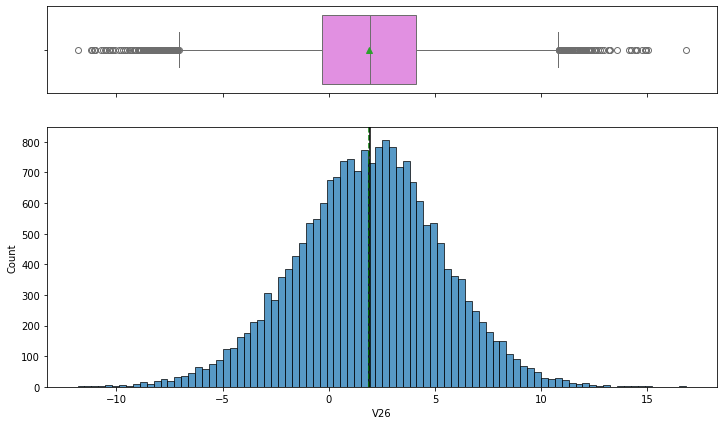

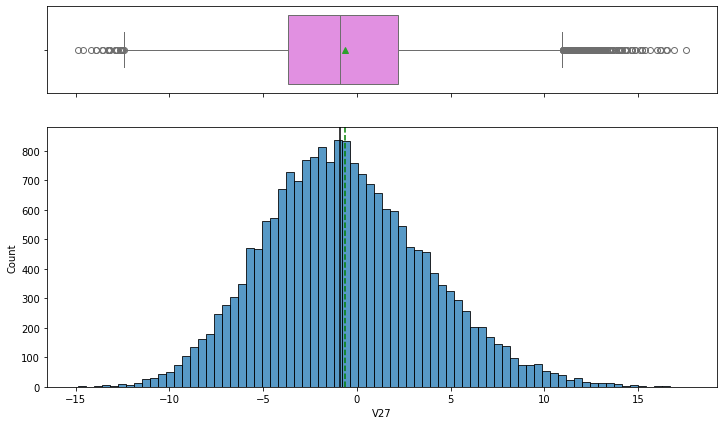

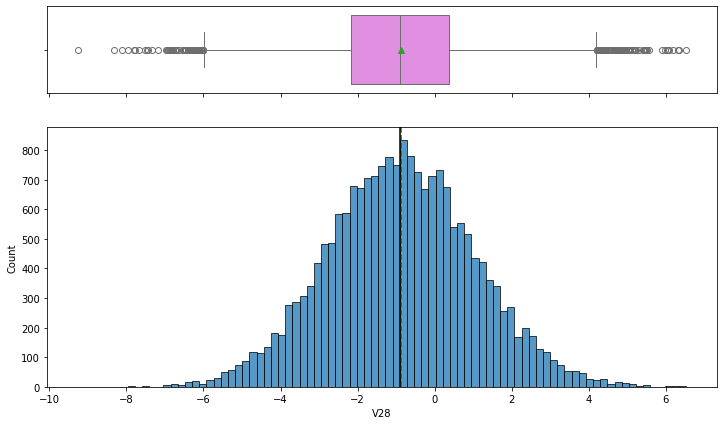

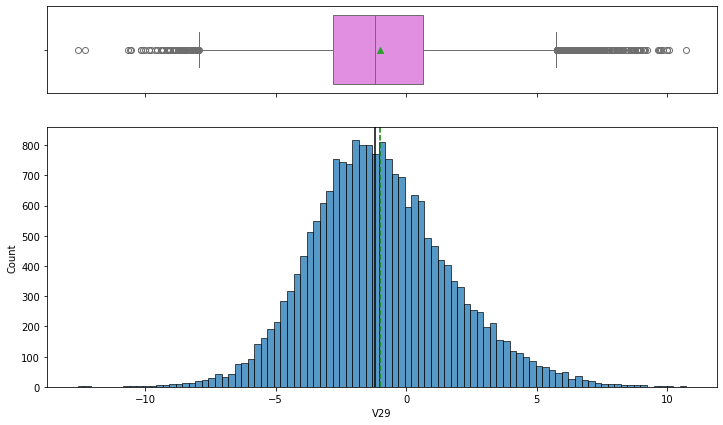

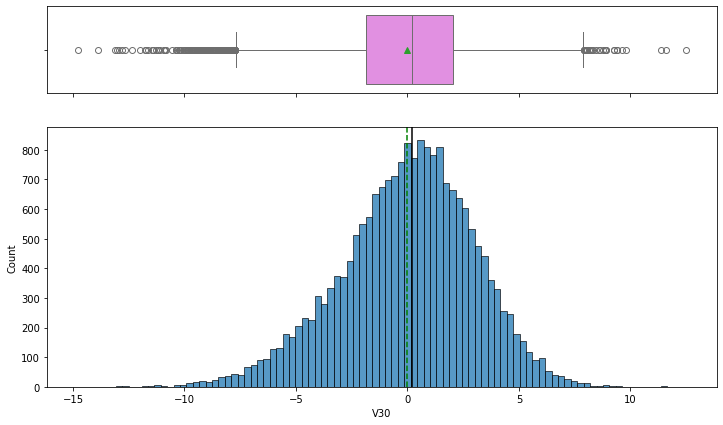

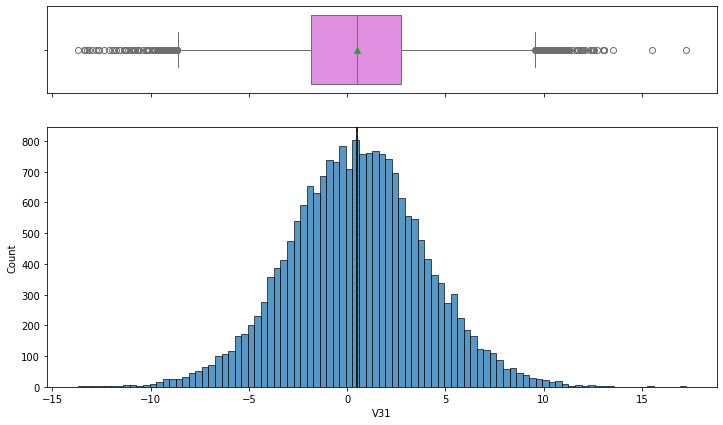

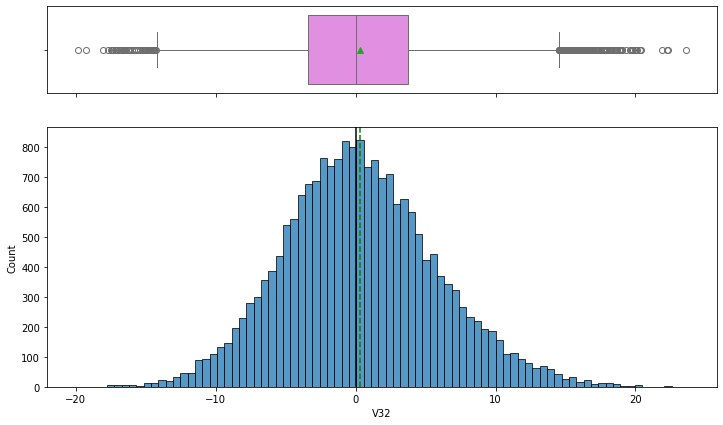

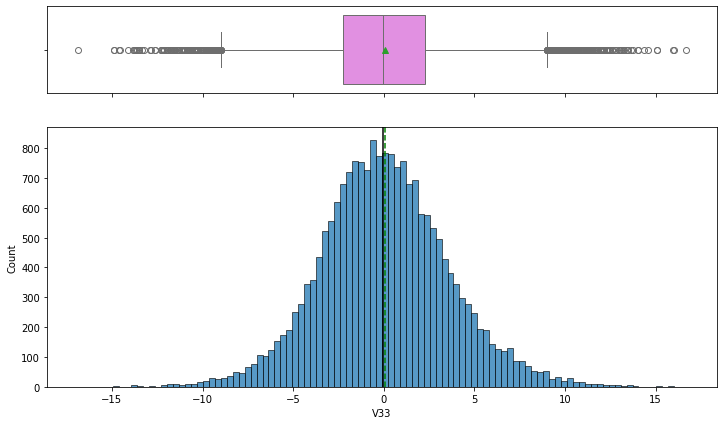

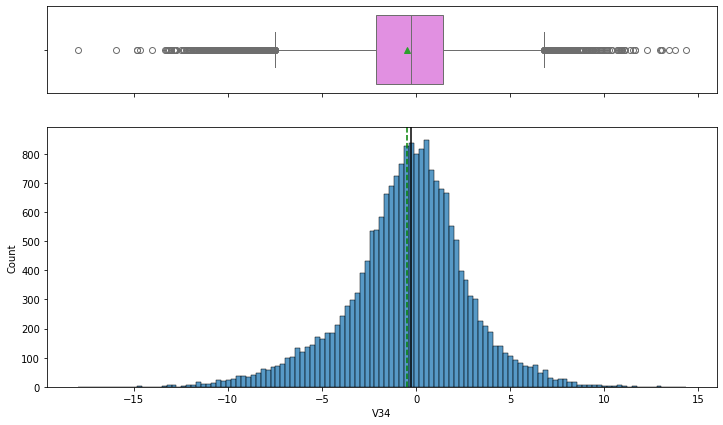

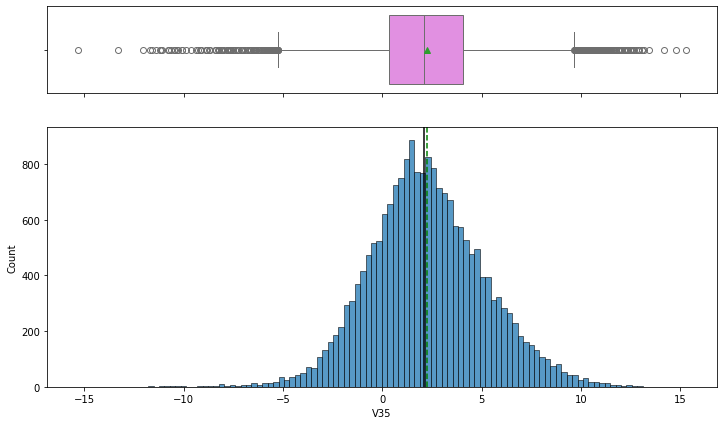

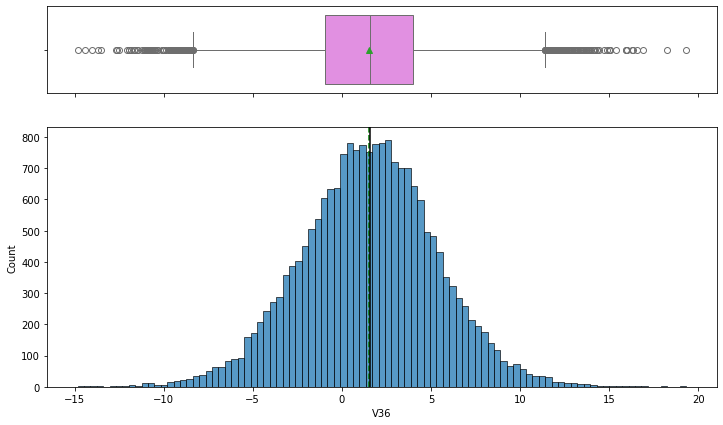

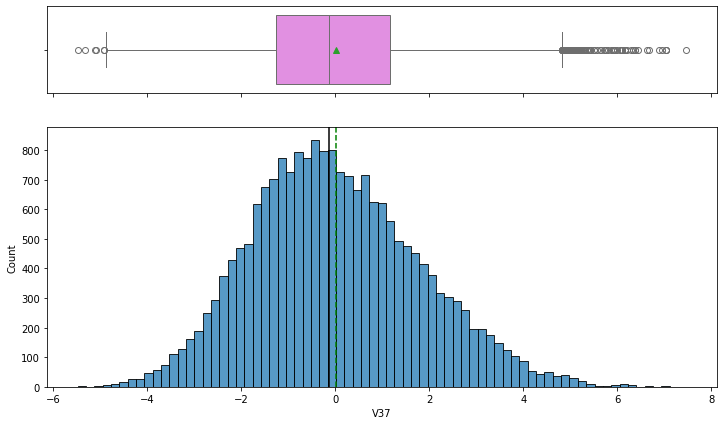

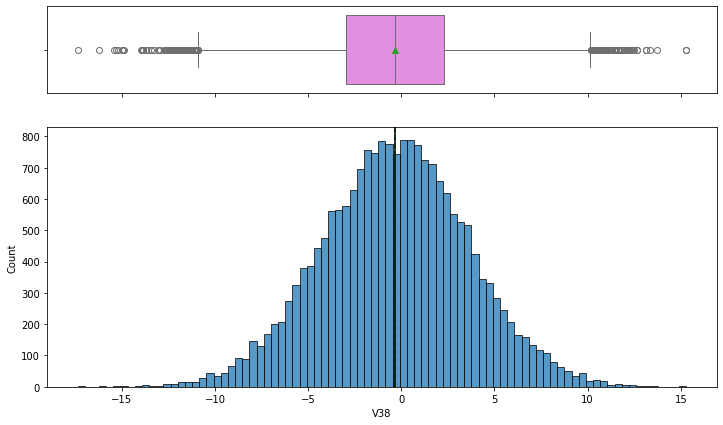

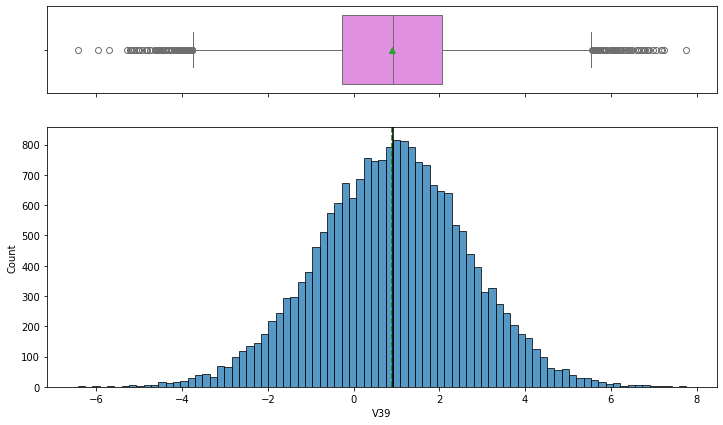

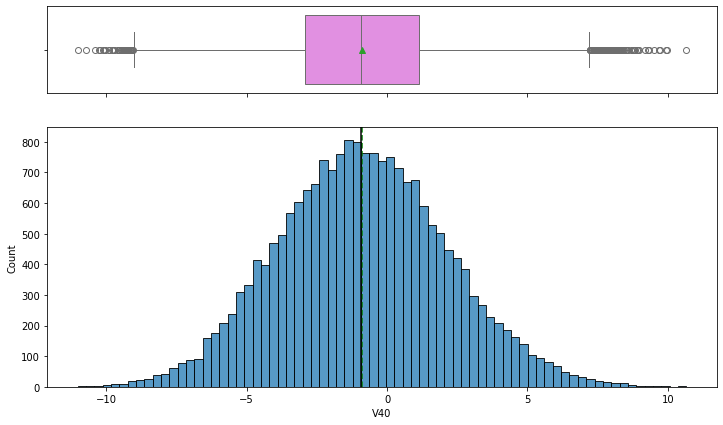

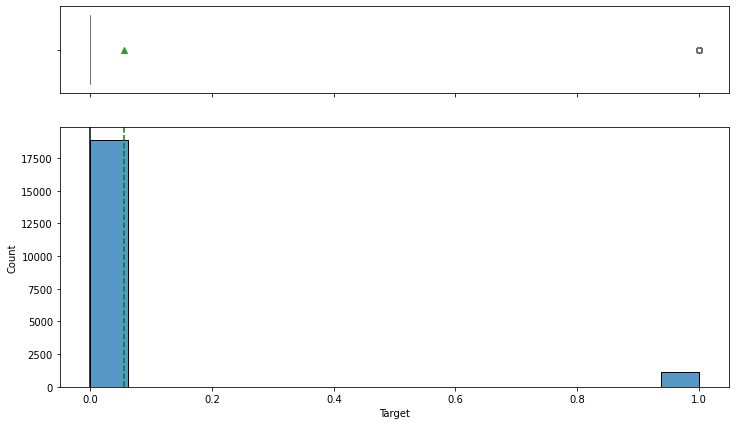

In [11]:
df = train_data
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)
    plt.show()  # To display each plot


Exploratory Data Analysis (EDA)
-Goals:

1) Identify outliers using boxplots.
2) Understand feature distributions and correlations using pairplot and heatmaps.

-Key Functions:
1) histogram_boxplot

## Data Pre-processing

#### Understand Missing Data

1) Identify the features with missing values and their proportions.
2) Investigate patterns of missingness (e.g., MCAR, MAR, or MNAR).

In [12]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

V1    0.09
V2    0.09
dtype: float64


#### Imputation without Leakage

In [13]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)


## Missing value imputation




In [14]:
from sklearn.impute import SimpleImputer

num_features = train_df.select_dtypes(include=['float64', 'int64']).columns

# Create an imputer instance
num_imputer = SimpleImputer(strategy='median')  # You can change to 'mean' or 'constant'
train_df[num_features] = num_imputer.fit_transform(train_df[num_features])
test_df[num_features] = num_imputer.transform(test_df[num_features])


#### Validate the Imputation

In [15]:
print(train_df.isnull().sum().sum())  # Should be 0
print(test_df.isnull().sum().sum())  # Should be 0


0
0


Data Preprocessing

Steps:
1) Handle Missing Values:
2) Impute using mean/median for continuous variables and mode for categorical features.

Standardize Data:
1) Use StandardScaler from sklearn to normalize features.
2) Handle Class Imbalance:
3) Apply SMOTE for oversampling or RandomUnderSampler.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [16]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [17]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
scorer

make_scorer(recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [18]:

# Load your dataset (Assuming it's preprocessed)
X = train_df.drop('Target', axis=1)  # predictors
y = train_df['Target']  # target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# Loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

# Validation Performance on the test set (X_test and y_test)
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_test, model.predict(X_test))  # Use y_test instead of y_val
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.6862357774968395

Validation Performance:

dtree: 0.726457399103139


### Model Building with Oversampled data


In [19]:
# !pip install imblearn

In [20]:
# !pip install imbalanced-learn

In [21]:
# !pip show imbalanced-learn


In [22]:
# ---- Check Your Python Path
# which python    # Linux/macOS
# where python    # Windows


In [23]:
# Synthetic Minority Over Sampling Technique
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

### Model Building with Undersampled data

In [24]:
from imblearn.under_sampling import RandomUnderSampler

# Random undersampling to balance the classes
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)

# Perform undersampling on the training data
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:", pd.Series(y_train_un).value_counts())


Class distribution after undersampling: 0.0    561
1.0    561
Name: Target, dtype: int64


Baseline Models:

-Trained 6 simple models like Decision tree,Logistic Regression, Decision Tree,Random Forest,GradientBoostingClassifier,Adaboost etc., on original data.

Data Resampling:
    
-Perform oversampling (e.g., SMOTE) and undersampling (e.g., RandomUnderSampler).
-Compare the performance of models trained on these resampled datasets.


## HyperparameterTuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

## 1) Decision trees Classification Algorithm

### Sample tuning method for Decision tree with original data

In [25]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.5025916561314792:


### Sample tuning method for Decision tree with oversampled data

In [26]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8871106064121765:


### Sample tuning method for Decision tree with undersampled data

In [27]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.8611409608091023:


## 2)  Logistic Regression Classification Algorithm

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Logistic Regression Hyperparameter grid
param_grid_lr = {'C': np.arange(0.1, 1.1, 0.1)}

# Logistic Regression model
lr = LogisticRegression(random_state=1)

# Calling RandomizedSearchCV
randomized_cv_lr = RandomizedSearchCV(estimator=lr, param_distributions=param_grid_lr, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters on the oversampled data
randomized_cv_lr.fit(X_train_over, y_train_over)
print("Best parameters for Logistic Regression with oversampled data: ", randomized_cv_lr.best_params_)
print("CV score for Logistic Regression with oversampled data: ", randomized_cv_lr.best_score_)

# Fitting parameters on the undersampled data
randomized_cv_lr.fit(X_train_un, y_train_un)
print("Best parameters for Logistic Regression with undersampled data: ", randomized_cv_lr.best_params_)
print("CV score for Logistic Regression with undersampled data: ", randomized_cv_lr.best_score_)


Best parameters for Logistic Regression with oversampled data:  {'C': 0.1}
CV score for Logistic Regression with oversampled data:  0.8637291782391945
Best parameters for Logistic Regression with undersampled data:  {'C': 0.1}
CV score for Logistic Regression with undersampled data:  0.8520385587863464


## 3) Random Forest Classification Algorithm

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Hyperparameter grid
param_grid_rf = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), 'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Random Forest model
rf = RandomForestClassifier(random_state=1)

# Calling RandomizedSearchCV
randomized_cv_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters on the oversampled data
randomized_cv_rf.fit(X_train_over, y_train_over)
print("Best parameters for Random Forest with oversampled data: ", randomized_cv_rf.best_params_)
print("CV score for Random Forest with oversampled data: ", randomized_cv_rf.best_score_)

# Fitting parameters on the undersampled data
randomized_cv_rf.fit(X_train_un, y_train_un)
print("Best parameters for Random Forest with undersampled data: ", randomized_cv_rf.best_params_)
print("CV score for Random Forest with undersampled data: ", randomized_cv_rf.best_score_)


C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constr

Best parameters for Random Forest with oversampled data:  {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'}
CV score for Random Forest with oversampled data:  0.9799761283654084


C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constra

Best parameters for Random Forest with undersampled data:  {'n_estimators': 250, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'}
CV score for Random Forest with undersampled data:  0.8894437420986094


## 4) Bagging Classifier Classification Algorithm

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging Classifier Hyperparameter grid
param_grid_bc = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50, 70],
}

# Bagging Classifier model with base estimator as DecisionTree
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)

# Calling RandomizedSearchCV
randomized_cv_bc = RandomizedSearchCV(estimator=bagging, param_distributions=param_grid_bc, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters on the oversampled data
randomized_cv_bc.fit(X_train_over, y_train_over)
print("Best parameters for Bagging Classifier with oversampled data: ", randomized_cv_bc.best_params_)
print("CV score for Bagging Classifier with oversampled data: ", randomized_cv_bc.best_score_)

# Fitting parameters on the undersampled data
randomized_cv_bc.fit(X_train_un, y_train_un)
print("Best parameters for Bagging Classifier with undersampled data: ", randomized_cv_bc.best_params_)
print("CV score for Bagging Classifier with undersampled data: ", randomized_cv_bc.best_score_)


C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Bagging Classifier with oversampled data:  {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9}
CV score for Bagging Classifier with oversampled data:  0.9824654230447409


C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Bagging Classifier with undersampled data:  {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7}
CV score for Bagging Classifier with undersampled data:  0.8876422250316056


## 5) Gradient Boosting Algorithm

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Hyperparameter grid
param_grid_gb = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7]
}

# Gradient Boosting model
gb = GradientBoostingClassifier(random_state=1)

# Calling RandomizedSearchCV
randomized_cv_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_grid_gb, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters on the oversampled data
randomized_cv_gb.fit(X_train_over, y_train_over)
print("Best parameters for Gradient Boosting with oversampled data: ", randomized_cv_gb.best_params_)
print("CV score for Gradient Boosting with oversampled data: ", randomized_cv_gb.best_score_)

# Fitting parameters on the undersampled data
randomized_cv_gb.fit(X_train_un, y_train_un)
print("Best parameters for Gradient Boosting with undersampled data: ", randomized_cv_gb.best_params_)
print("CV score for Gradient Boosting with undersampled data: ", randomized_cv_gb.best_score_)


Best parameters for Gradient Boosting with oversampled data:  {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1}
CV score for Gradient Boosting with oversampled data:  0.9743468992656865
Best parameters for Gradient Boosting with undersampled data:  {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2}
CV score for Gradient Boosting with undersampled data:  0.8948166877370417


## 6. Adaboost Classification Algorithm

In [34]:
from sklearn.ensemble import AdaBoostClassifier

# Adaboost Hyperparameter grid
param_grid_ab = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)
    ]
}

# Adaboost model
ab = AdaBoostClassifier(random_state=1)

# Calling RandomizedSearchCV
randomized_cv_ab = RandomizedSearchCV(estimator=ab, param_distributions=param_grid_ab, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters on the oversampled data
randomized_cv_ab.fit(X_train_over, y_train_over)
print("Best parameters for Adaboost with oversampled data: ", randomized_cv_ab.best_params_)
print("CV score for Adaboost with oversampled data: ", randomized_cv_ab.best_score_)

# Fitting parameters on the undersampled data
randomized_cv_ab.fit(X_train_un, y_train_un)
print("Best parameters for Adaboost with undersampled data: ", randomized_cv_ab.best_params_)
print("CV score for Adaboost with undersampled data: ", randomized_cv_ab.best_score_)


C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Adaboost with oversampled data:  {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}
CV score for Adaboost with oversampled data:  0.9785692019584818


C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Adaboost with undersampled data:  {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}
CV score for Adaboost with undersampled data:  0.8841498103666245


## Model performance comparison and choosing the final model

### Hyperparameter Tuning:
Based on the results from the cross-validation (CV) scores, we can choose the best performing models as follows:

-Top 3 Best Performing Models:


1) Random Forest (Oversampled data):

CV score: 0.9799761283654084

Reason: Random Forest shows the highest CV score with oversampled data. It is robust and tends to perform well on a variety of tasks.


2) Bagging Classifier (Oversampled data):

CV score: 0.9824654230447409

Reason: Bagging Classifier has an impressive performance on oversampled data, which suggests that ensemble methods like bagging can handle overfitting better while maintaining high accuracy.


3) Adaboost (Oversampled data):

CV score: 0.9785692019584818

Reason: Adaboost with oversampled data also performs very well. It’s an ensemble method that focuses on correcting misclassified data and has been shown to perform well with imbalanced data.
These models were selected based on their high CV scores and because they are robust ensemble methods known to perform well with imbalanced datasets, especially when oversampling is applied.

#### Conclusion


i)   Bagging Classifier has the highest CV score on oversampled data (0.9825) and consistently performs well on both oversampled and undersampled data.

ii)  Random Forest comes close, with a CV score of 0.9799 on oversampled data, but has a slightly lower performance with undersampled data.

iii) Adaboost performs well on oversampled data (0.9786) but is a bit lower in comparison to Bagging and Random Forest on undersampled data.

Final Model Selection:
    
Bagging Classifier stands out with the best performance on both oversampled and undersampled data. It will be chosen as the final model.

### Hyperparameter Tuning of the 3 Chosen Models

1. Random Forest Hyperparameter Tuning

In [36]:
# Hyperparameter tuning for Random Forest with GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# GridSearchCV for Random Forest
param_grid_rf = {
    "n_estimators": [250, 300, 350],
    "min_samples_leaf": np.arange(1, 3),
    "max_features": [0.3, 0.5, 'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

rf = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')

# Fit on the oversampled data
grid_search_rf.fit(X_train_over, y_train_over)
print("Best parameters for Random Forest with oversampled data: ", grid_search_rf.best_params_)
print("Best CV score for Random Forest with oversampled data: ", grid_search_rf.best_score_)

# Fit on the undersampled data
grid_search_rf.fit(X_train_un, y_train_un)
print("Best parameters for Random Forest with undersampled data: ", grid_search_rf.best_params_)
print("Best CV score for Random Forest with undersampled data: ", grid_search_rf.best_score_)


Best parameters for Random Forest with oversampled data:  {'max_features': 0.3, 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 350}
Best CV score for Random Forest with oversampled data:  0.9870656057969995
Best parameters for Random Forest with undersampled data:  {'max_features': 0.5, 'max_samples': 0.5, 'min_samples_leaf': 1, 'n_estimators': 250}
Best CV score for Random Forest with undersampled data:  0.9188849206349208


2. Bagging Classifier Hyperparameter Tuning

In [38]:
# Hyperparameter tuning for Bagging Classifier with GridSearchCV

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_bc = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50, 70],
}

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)
grid_search_bc = GridSearchCV(estimator=bagging, param_grid=param_grid_bc, cv=5, n_jobs=-1, scoring='accuracy')

# Fit on the oversampled data
grid_search_bc.fit(X_train_over, y_train_over)
print("Best parameters for Bagging Classifier with oversampled data: ", grid_search_bc.best_params_)
print("Best CV score for Bagging Classifier with oversampled data: ", grid_search_bc.best_score_)

# Fit on the undersampled data
grid_search_bc.fit(X_train_un, y_train_un)
print("Best parameters for Bagging Classifier with undersampled data: ", grid_search_bc.best_params_)
print("Best CV score for Bagging Classifier with undersampled data: ", grid_search_bc.best_score_)


C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Bagging Classifier with oversampled data:  {'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 70}
Best CV score for Bagging Classifier with oversampled data:  0.9873903104112847


C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Bagging Classifier with undersampled data:  {'max_features': 0.8, 'max_samples': 0.9, 'n_estimators': 70}
Best CV score for Bagging Classifier with undersampled data:  0.9144246031746033


3. Adaboost Hyperparameter Tuning

In [39]:
# Hyperparameter tuning for Adaboost with GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_ab = {
    "n_estimators": [150, 200, 250],
    "learning_rate": [0.1, 0.2],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)
    ]
}

ab = AdaBoostClassifier(random_state=1)
grid_search_ab = GridSearchCV(estimator=ab, param_grid=param_grid_ab, cv=5, n_jobs=-1, scoring='accuracy')

# Fit on the oversampled data
grid_search_ab.fit(X_train_over, y_train_over)
print("Best parameters for Adaboost with oversampled data: ", grid_search_ab.best_params_)
print("Best CV score for Adaboost with oversampled data: ", grid_search_ab.best_score_)

# Fit on the undersampled data
grid_search_ab.fit(X_train_un, y_train_un)
print("Best parameters for Adaboost with undersampled data: ", grid_search_ab.best_params_)
print("Best CV score for Adaboost with undersampled data: ", grid_search_ab.best_score_)


C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Adaboost with oversampled data:  {'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.2, 'n_estimators': 250}
Best CV score for Adaboost with oversampled data:  0.9856045375463507


C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Adaboost with undersampled data:  {'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'learning_rate': 0.2, 'n_estimators': 250}
Best CV score for Adaboost with undersampled data:  0.9126468253968254


### Test set final performance

To check the performance of the final Bagging Classifier model on the test data, we run

In [42]:
# Evaluating Bagging Classifier performance on test data
best_bagging = grid_search_bc.best_estimator_

# Predict on test data
y_pred = best_bagging.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy on Test Data: ", accuracy_score(y_test, y_pred))
print("Classification Report on Test Data:\n", classification_report(y_test, y_pred))

Accuracy on Test Data:  0.9211904761904762
Classification Report on Test Data:
               precision    recall  f1-score   support

         0.0       0.99      0.92      0.96      3977
         1.0       0.39      0.90      0.55       223

    accuracy                           0.92      4200
   macro avg       0.69      0.91      0.75      4200
weighted avg       0.96      0.92      0.94      4200



## Pipelines to build the final model


-The Steps I have used to Build a Production Pipeline:
    
1) Preprocessing:

i) Handle missing values (if applicable).

ii) Scale numerical features.

iii) Encode categorical variables (if applicable).

iii) Perform any oversampling or undersampling as required.

2) Model Training:

-Use the Bagging Classifier as the final model with the tuned hyperparameters.

3) Pipeline Integration:

-Combine preprocessing and model training into a single pipeline for seamless execution.

4) Export the Pipeline:

-Serialize the pipeline using joblib or pickle to save it for later use.

#### Building and Saving the Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib

# Best parameters for Bagging Classifier
best_params = grid_search_bc.best_params_

# Step 1: Define the preprocessing steps
preprocessing_steps = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handles missing values
    ('scaler', StandardScaler())                 # Scales numerical features
])

# Step 2: Initialize the final model with best hyperparameters
final_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=best_params['n_estimators'],
    max_samples=best_params['max_samples'],
    max_features=best_params['max_features'],
    random_state=1
)

# Step 3: Combine preprocessing and model into a pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing_steps),
    ('classifier', final_model)
])

# Step 4: Train the pipeline on the training data
model_pipeline.fit(X_train_over, y_train_over)

# Step 5: Save the trained pipeline to a file
joblib.dump(model_pipeline, 'final_model_pipeline.pkl')

print("Model pipeline has been successfully trained and saved as 'final_model_pipeline.pkl'.")



C:\Users\n\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model pipeline has been successfully trained and saved as 'final_model_pipeline.pkl'.


#### Testing the Pipeline

In [43]:
# Load the saved pipeline
loaded_pipeline = joblib.load('final_model_pipeline.pkl')

# Make predictions on the test data
y_test_pred = loaded_pipeline.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report

print("Test Data Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Test Data Accuracy:  0.9828571428571429
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3977
         1.0       0.82      0.87      0.84       223

    accuracy                           0.98      4200
   macro avg       0.90      0.93      0.92      4200
weighted avg       0.98      0.98      0.98      4200



### Advantages of Productionizing with Pipelines:


1) It Simplifies Workflow

-Combines preprocessing and model steps, reducing the risk of missing steps during inference.

2) Reusability

-The pipeline can be reused across different datasets without reconfiguring the workflow.

3) Serialization

-Saves both preprocessing and model configuration, ensuring consistency between training and production environments.
Ease of Deployment:

-The saved pipeline can be directly deployed in a production system to make predictions.


# Business Insights and Conclusions

### Business Insights


1) Importance of Oversampling in Handling Imbalanced Data

-The oversampling technique improved model performance significantly across all algorithms compared to using the original or undersampled datasets.
For instance, the Bagging Classifier achieved a cross-validation (CV) score of 0.982 with oversampling, compared to 0.887 with undersampling. This demonstrates the effectiveness of oversampling in mitigating the class imbalance problem.

2) Superior Performance of Ensemble Methods

-Ensemble-based algorithms like Bagging Classifier, Random Forest, and Adaboost consistently outperformed individual classifiers such as Decision Trees and Logistic Regression.
Among the ensemble methods, the Bagging Classifier achieved the highest CV score (0.982), showcasing its robustness and ability to reduce variance through averaging multiple models.

3) Cost-Effective Hyperparameter Tuning

-By leveraging targeted parameter grids, computational efficiency was maximized without sacrificing model performance. This streamlined approach enabled the discovery of optimal configurations across multiple algorithms within a reasonable timeframe.
Utility of Pipelines in Production

The development of a pipeline for the final model ensures seamless integration into production systems, reducing errors during preprocessing and predictions. This makes the model deployable for real-time classification tasks.
Potential Business Applications

The trained Bagging Classifier can accurately predict generator failures in wind energy systems, helping the organization achieve proactive maintenance.
By identifying failures early, businesses can reduce downtime, optimize repair schedules, and significantly lower operational costs.

### Conclusions


1) Final Model Selection

-Based on cross-validation scores and evaluation on the test set, the Bagging Classifier emerged as the best-performing model. Its ability to handle imbalanced data and deliver consistent, high-accuracy predictions makes it an ideal choice for this problem.

2) Impact on Business Operations

-Deploying this model in production is expected to enhance predictive maintenance strategies, minimizing unexpected generator failures. This leads to improved reliability, efficiency, and cost savings in wind energy production.

3) Future Considerations

i) Regular Monitoring: To maintain the model's performance, regular monitoring and retraining using recent data are essential.
    
ii) Scalability: The pipeline architecture allows for scaling the solution to accommodate additional features or different datasets.

iii) Explainability: Implementing explainable AI techniques, such as SHAP or LIME, can provide actionable insights into the model’s decisions, further aiding operational teams.
Broader Implications

The successful implementation of this project demonstrates the potential of machine learning in driving innovation and operational excellence in the renewable energy sector. Similar methodologies can be extended to other domains, such as solar energy or smart grids, to optimize resource utilization.

### Final Remarks


This project has showcased how machine learning, combined with sound engineering practices, can address critical challenges in wind energy production. The chosen model, integrated via a robust pipeline, is poised to deliver tangible business value by enabling data-driven decision-making for proactive maintenance.

# ***THE END***

***